# SuNBEaM

(S)pectral (N)on-(B)acktracking (E)igenvalue Pseudo-(M)etric, or SuNBEaM for short. The non-backtracking
matrix (aka the Hashimoto matrix) is a matrix representation of a graph that has deep connections with the theory of the length spectrum. The eigenvalues of the non-backtracking matrix can be effectively used to compute dissimilarity scores (or distances) between graphs. For more information, see 

> Leo Torres, P. Suárez Serrato, and T. Eliassi-Rad, **Graph Distance from
> the Topological View of Non-Backtracking Cycles**, preprint,
> arXiv:1807.09592 [cs.SI], (2018).

In [1]:
from sunbeam import *
import numpy as np
import networkx as nx
import matplotlib.pylab as plt

## The Non-Backtracking Matrix

The non-backtracking matrix is the (unnormalized) transition matrix of a random walker that does not backtrack, that is, it never traverses the same edge twice in succession. It can be used to, among other things, compute the number of non-backtracking walks in a graph.

The non-backtracking matrix of a cycle graph is always a permutation matrix.

In [2]:
graph = nx.cycle_graph(5)
nbm = fast_hashimoto(graph)
nbm.sum(axis=1).T, nbm.sum(axis=0)

(matrix([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]]),
 matrix([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]]))

The diagonal elements of powers of the non-backtracking matrix can be used to compute the number of non-backtracking cycles. For example, the trace of the cube gives the number of triangles.

In [3]:
graph = nx.erdos_renyi_graph(100, 0.1)
nbm = fast_hashimoto(graph)
directed_triangles = (nbm.dot(nbm).dot(nbm)).diagonal().sum()
undirected_triangles = sum(nx.triangles(graph).values())
directed_triangles == 2*undirected_triangles

True

## Eigenvalues

Non-backtracking cycles are topologically informative, so we wish to count how many of them exist in a graph. The above procedure gives one way to do it in the case of triangles. However, to compute larger cycles, we need the traces of powers of the non-backtracking matrix. These can be computed using the eigenvalues of the matrix. SuNBEaM provides this functionality.

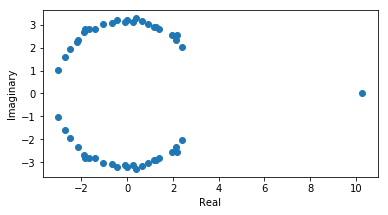

In [4]:
eigs = nbeigs(graph, 50, fmt='2D') # Compute the largest 50 eigenvalues
plt.scatter(eigs.T[0], eigs.T[1])
plt.gca().set_aspect('equal')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()

Geometric features of the eigenvalue distribution in the complex plane are correlated to structural graph features. In the next plot we show the largest 200 eigenvalues of six different random graph models.

In [5]:
from matplotlib.lines import Line2D

options = [{'color': '#1f77b4', 'label': 'Erdos-Renyi'},
           {'color': '#ff7f0e', 'label': 'Kronecker'},
           {'color': '#2ca02c', 'label': 'Barabasi-Albert'},
           {'color': '#d62728', 'label': 'Configuration Model'},
           {'color': '#9467bd', 'label': 'Watts-Strogatz'},
           {'color': '#17becf', 'label': 'Hyperbolic Graph'}]

def make_plot(data, get_xy, size=0.2):
    """Plot eigenvalue data."""
    handles = []
    for i in range(6):
        rows = data[50*i : 50*(i+1)]
        xx, yy = get_xy(rows)
        plt.scatter(xx, yy, s=size, color=options[i]['color'])
        handles.append(Line2D([], [], marker='o', markersize=8, color='w',
                              label=options[i]['label'],
                              markerfacecolor=options[i]['color']))

    plt.gca().set_aspect('equal')
    plt.legend(handles=handles)
    plt.xlabel('Real')
    plt.ylabel('Imaginary')

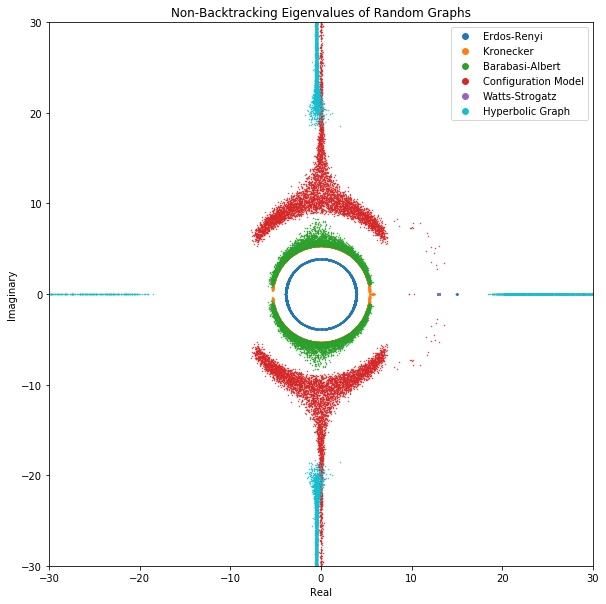

In [6]:
random_eigs = np.load('data.npy')

plt.figure(figsize=(10, 10))
make_plot(random_eigs, lambda rows: (rows[:, :200], rows[:, 200:]))
plt.xlim(-30, 30)
plt.ylim(-30, 30)
plt.title('Non-Backtracking Eigenvalues of Random Graphs')
plt.show()

## Distance

The theory of the length spectrum predicts that the eigenvalues of the non-backtracking matrix will be effective at computing distance between graphs. Before, we plotted each one of several eigenvalues in the complex plane. Here, we apply dimensionality reduction (kernel PCA with cosine similarity) to plot each _graph_ in two dimensions.

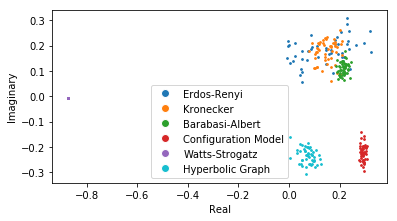

In [9]:
from sklearn.decomposition import KernelPCA

reduced = KernelPCA(kernel='cosine', n_components=2).fit_transform(random_eigs)
plt.figure(figsize=(6, 6))
make_plot(reduced, lambda rows: (rows.T[0], rows.T[1]), size=3)
plt.show()

Once in this reduced space, one can compute the distance between two graphs by using, for example, the 2D Ecludian distance. This is of course only one way to compute distance between graphs using the non-backtracking eigenvalues. For more discussion, see

> Leo Torres, P. Suárez Serrato, and T. Eliassi-Rad, **Graph Distance from
> the Topological View of Non-Backtracking Cycles**, preprint,
> arXiv:1807.09592 [cs.SI], (2018).